# regression explore

- Factor returns and test for significance (not zero)
- DJIA returns against factor returns
- stock returns against factor returns

## Data

In [1]:
import pandas as pd

factor_returns = pd.read_csv('data/factor_returns.csv', index_col=0, parse_dates=True)
djia_returns = pd.read_csv('data/DJIA.csv', index_col=0, parse_dates=True)

## Factor returns and test for significance (not zero)

1. average factor returns (annualized)
2. t-test for factor returns

In [2]:
# Factor returns (annualized)
(factor_returns.mean() + 1) ** 52 - 1

mktrf    0.100966
smb      0.005043
hml     -0.001642
rmw      0.040979
cma      0.002449
rf       0.013453
umd      0.011039
dtype: float64

In [3]:
factor_returns

,mktrf,smb,hml,rmw,cma,rf,umd
date,,,,,,,
2004-01-09,0.014692,0.011545,0.011837,-0.031015,0.027469,0.00015,0.024227
2004-01-16,0.017361,0.009913,0.009712,-0.021018,0.018302,0.00015,0.016675
2004-01-23,0.003278,0.007970,0.007807,0.013115,-0.010812,0.00012,-0.012367
2004-01-30,-0.011946,-0.013974,-0.009902,0.009665,-0.008218,0.00015,-0.012953
2004-02-06,0.009092,-0.004665,-0.001827,0.008969,-0.005498,0.00015,-0.002957
...,...,...,...,...,...,...,...
2023-12-01,0.010108,0.019615,0.017470,-0.012658,0.004690,0.00105,-0.021881
2023-12-08,0.002140,0.010579,0.009969,-0.005301,0.003563,0.00105,-0.003411
2023-12-15,0.027117,0.020715,0.017806,-0.011688,0.006181,0.00105,-0.022346


In [17]:
# t-test for factor returns
from scipy import stats
t_test = stats.ttest_1samp(factor_returns["2013-12-31":], popmean=0)
test_result = pd.DataFrame(t_test.pvalue, columns=['p_value'])
test_result.index = factor_returns.columns
test_result['<0.05'] = test_result['p_value'] < 0.05
test_result


,p_value,<0.05
mktrf,3.909139e-02,True
smb,5.858622e-01,False
hml,7.056810e-01,False
rmw,1.335556e-01,False
cma,8.788835e-01,False
rf,6.260281e-53,True
umd,8.844147e-01,False


In [5]:
# raw factor returns
raw_factor_returns = pd.read_excel('data/raw_factor_returns.xlsx', index_col=0, parse_dates=True)
t_test = stats.ttest_1samp(raw_factor_returns, popmean=0)
test_result = pd.DataFrame(t_test.pvalue, columns=['p_value'])
test_result.index = raw_factor_returns.columns
test_result['<0.05'] = test_result['p_value'] < 0.05
test_result


,p_value,<0.05
Excess Return on the Market,0.022223,True
Small-Minus-Big Return,0.815371,False
High-Minus-Low Return,0.954349,False
Robust Minus Weak Return,0.012811,True
Conservative Minus Aggressive Return,0.836199,False
Risk-Free Return Rate (One Month Treasury Bill Rate),0.000000,True
Momentum,0.788448,False


<Axes: >

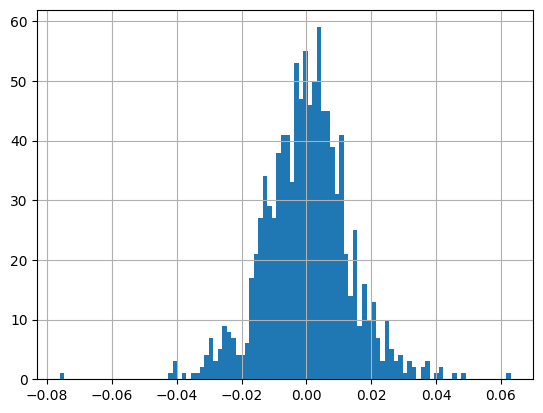

In [8]:
factor_returns['smb'].hist(bins=100)

In [9]:
stats.ttest_1samp(factor_returns['smb'], popmean=0)

TtestResult(statistic=np.float64(0.23947832968935495), pvalue=np.float64(0.8107817946585592), df=np.int64(1042))